# Importing required libraries

In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

# Reading Data

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
test_df = pd.read_csv("test.csv")

In [4]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# checking the shape of training and testing data.

training data contains 42000 samples of images i.e rows and 785 columns
testing data contains 28000 samples of images i.e rows and 784 columns

In [5]:
print("training data:",train_df.shape)    
print("testing data:",test_df.shape)

training data: (42000, 785)
testing data: (28000, 784)


# Splitting Data into training and testing set

dividing training data in X and y variable

In [6]:
X = train_df.iloc[:,1:].values
y = train_df.iloc[:,0].values
test_df = test_df.values

Checking shapes of X and y

In [7]:
print(X.shape)
print(y.shape)
print(test_df.shape)

(42000, 784)
(42000,)
(28000, 784)


Currently data is in the range of (0,255), for better perfomance of our neural network model we have to scale the data from range of (0,255) to (0,1).
to scale the data we divide each pixel by 255

In [8]:
X = X / 255
test_df = test_df / 255

using train test split for splitting data in X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

checking shapes of all

In [10]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (31500, 784)
X_test: (10500, 784)
y_train: (31500,)
y_test: (10500,)


pixels of images are not in correct shape. Dataset contains 28 X 28 i.e 28 pixel heaigh and 28 pixel width grayscale image, thats why shape of each image should be 28 X 28 shape.

In [11]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
test_df = test_df.reshape(-1,28,28,1)

In [12]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("test_df:",test_df.shape)

X_train: (31500, 28, 28, 1)
X_test: (10500, 28, 28, 1)
test_df: (28000, 28, 28, 1)


Visualizing some images with matplotlib

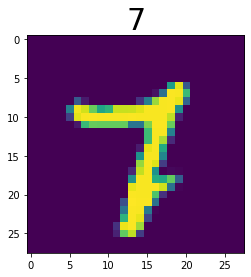

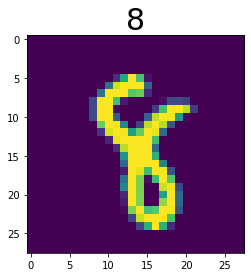

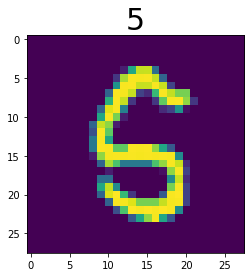

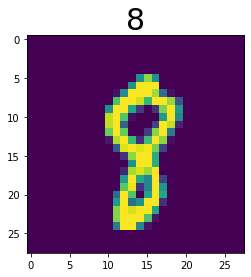

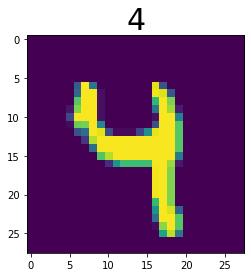

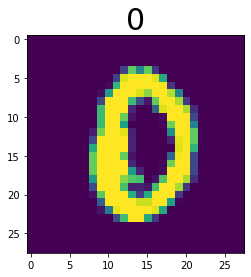

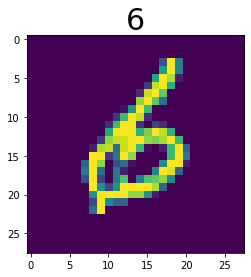

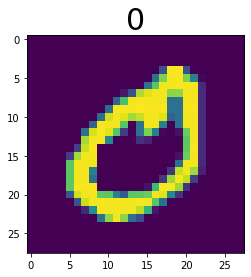

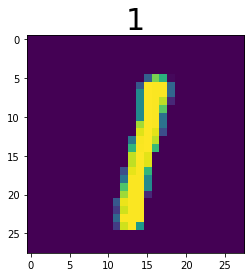

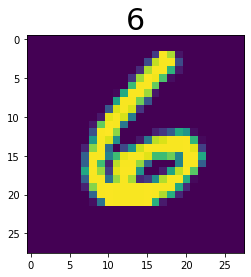

In [13]:
for i in range(10):
    plt.imshow(X_train[i])
    plt.title(y_train[i],fontdict={'fontsize':30})
    plt.show()

# Building a neural network model

creating a sequntial model

In [14]:
model = Sequential()

adding layer to sequential model

In [15]:
# adding convolutional2d layer with kernal size i.e feature detector size (5,5) and
# filters i.e no. of filters or feature detectors.
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=[28,28,1],padding='same'))


model.add(MaxPool2D(padding='same')) # adding Maxpool2D layer for pooling, with pool size of (2,2)

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(padding='same'))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(padding='same'))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(padding='same'))

# Now we have to flatten our pooled feature to column vector, The reason we do 
# this is that we're going to need to insert this data into an artificial neural 
#network later on.
model.add(Flatten())

# Now add Dense layer to Sequential model and use this flatten features as input 
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

# Add last output generating layer in our model
model.add(Dense(10,activation='softmax'))

# getting model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

creating early stopping

In [16]:
es = EarlyStopping(monitor='val_loss',patience=3,mode='min')

# Compiling Model

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training The Model

In [18]:
model.fit(X_train,y_train,verbose=2,validation_data=(X_test,y_test),batch_size=128,epochs=50,callbacks=[es])

Epoch 1/50
247/247 - 39s - loss: 0.9793 - accuracy: 0.6525 - val_loss: 0.1362 - val_accuracy: 0.9638 - 39s/epoch - 157ms/step
Epoch 2/50
247/247 - 32s - loss: 0.1913 - accuracy: 0.9544 - val_loss: 0.0739 - val_accuracy: 0.9821 - 32s/epoch - 128ms/step
Epoch 3/50
247/247 - 31s - loss: 0.1192 - accuracy: 0.9734 - val_loss: 0.0735 - val_accuracy: 0.9829 - 31s/epoch - 124ms/step
Epoch 4/50
247/247 - 31s - loss: 0.0897 - accuracy: 0.9803 - val_loss: 0.0489 - val_accuracy: 0.9887 - 31s/epoch - 125ms/step
Epoch 5/50
247/247 - 31s - loss: 0.0754 - accuracy: 0.9844 - val_loss: 0.0521 - val_accuracy: 0.9887 - 31s/epoch - 127ms/step
Epoch 6/50
247/247 - 30s - loss: 0.0691 - accuracy: 0.9857 - val_loss: 0.0555 - val_accuracy: 0.9872 - 30s/epoch - 123ms/step
Epoch 7/50
247/247 - 30s - loss: 0.0535 - accuracy: 0.9890 - val_loss: 0.0571 - val_accuracy: 0.9888 - 30s/epoch - 123ms/step


In [19]:
model.save('model.h5')